In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

In [2]:
pga = pd.read_csv('pgaTourData.csv')
#display(pga.head(10))

print(pga.shape)
print(pga.info())

(2312, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         2312 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway Percentage  1678 non-null   float64
 3   Year                2312 non-null   int64  
 4   Avg Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average Putts       1678 non-null   float64
 7   Average Scrambling  1678 non-null   float64
 8   Average Score       1678 non-null   float64
 9   Points              2296 non-null   object 
 10  Wins                293 non-null    float64
 11  Top 10              1458 non-null   float64
 12  Average SG Putts    1678 non-null   float64
 13  Average SG Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64


In [3]:
pga.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"


In [4]:
#points are an object, because they have commas "," ad thousands separator
#delete the non numerical charachters and turn money into float, because they have thousands separator and "$"
pga['Money'] = pga['Money'].str.replace(r'\D', '').astype(float)

pga['Points'] = pga['Points'].str.replace(r'\D', '').astype(float)
pga

/var/folders/1k/qmqq8bb52d53jfplbrl37dtc0000gn/T/ipykernel_13907/17715091.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  pga['Money'] = pga['Money'].str.replace(r'\D', '').astype(float)
/var/folders/1k/qmqq8bb52d53jfplbrl37dtc0000gn/T/ipykernel_13907/17715091.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  pga['Points'] = pga['Points'].str.replace(r'\D', '').astype(float)


,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868.0,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,2680487.0
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006.0,1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,2485203.0
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020.0,NaN,3.0,0.192,0.674,0.183,0.437,-0.137,2700018.0
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795.0,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,1986608.0
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421.0,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,1089763.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,Carl Paulson,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16943.0
2308,Peter Tomasulo,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12827.0
2309,Marc Turnesa,NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10159.0
2310,Jesper Parnevik,NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9165.0


In [5]:
pga.columns = pga.columns.str.replace(' ','_')
pga

,Player_Name,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,Wins,Top_10,Average_SG_Putts,Average_SG_Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868.0,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,2680487.0
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006.0,1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,2485203.0
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020.0,NaN,3.0,0.192,0.674,0.183,0.437,-0.137,2700018.0
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795.0,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,1986608.0
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421.0,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,1089763.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,Carl Paulson,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16943.0
2308,Peter Tomasulo,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12827.0
2309,Marc Turnesa,NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10159.0
2310,Jesper Parnevik,NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9165.0


In [6]:
pga.describe()

,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,Wins,Top_10,Average_SG_Putts,Average_SG_Total,SG:OTT,SG:APR,SG:ARG,Money
count,1678.000000,1678.000000,2312.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,2296.000000,293.000000,1458.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,2.300000e+03
mean,78.711561,61.440560,2013.996107,290.807688,65.661675,29.163331,58.115638,70.921961,481.663328,1.218430,2.781893,0.025641,0.148105,0.037759,0.065015,0.019974,1.124903e+06
std,14.274137,5.058845,2.581176,8.916631,2.745411,0.518468,3.384769,0.698305,463.067732,0.573443,1.895094,0.343787,0.694923,0.379892,0.380952,0.223361,1.354085e+06
min,45.000000,43.020000,2010.000000,266.400000,53.540000,27.510000,44.010000,68.698000,1.000000,1.000000,1.000000,-1.475000,-3.209000,-1.717000,-1.680000,-0.930000,5.520000e+03
25%,69.000000,57.942500,2012.000000,284.900000,63.830000,28.810000,55.900000,70.494250,113.000000,1.000000,1.000000,-0.187000,-0.254750,-0.190250,-0.180750,-0.123000,1.853258e+05
50%,79.500000,61.430000,2014.000000,290.550000,65.790000,29.140000,58.275000,70.902000,381.500000,1.000000,2.000000,0.040000,0.147000,0.056000,0.081000,0.022000,6.994425e+05
75%,89.000000,64.910000,2016.000000,296.400000,67.580000,29.520000,60.420000,71.342750,676.000000,1.000000,4.000000,0.257000,0.568500,0.291500,0.314500,0.175000,1.526660e+06
max,120.000000,76.880000,2018.000000,319.700000,73.520000,31.000000,69.330000,74.400000,4169.000000,5.000000,14.000000,1.130000,2.406000,1.485000,1.533000,0.660000,1.203046e+07


# Adding the points won in the consecutive year

In [7]:
pga_test1 = pga[['Player_Name', 'Year', 'Points']]
pga_test1 = pga_test1.rename(columns={'Player_Name': 'Player_Name+1', 'Year': 'Year+1', 'Points':'Points_next_year'})
#pga_test1

In [8]:
for i in pga_test1.index:
    pga_test1['Year+1'][i] = pga_test1['Year+1'][i] -1
#pga_test1

/var/folders/1k/qmqq8bb52d53jfplbrl37dtc0000gn/T/ipykernel_13907/779698421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pga_test1['Year+1'][i] = pga_test1['Year+1'][i] -1


In [9]:
pga = pd.merge(pga, pga_test1, left_on=["Player_Name", "Year"], right_on=["Player_Name+1", "Year+1"])
pga = pga.drop(columns=['Player_Name+1', 'Year+1'])
pga

,Player_Name,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,Wins,Top_10,Average_SG_Putts,Average_SG_Total,SG:OTT,SG:APR,SG:ARG,Money,Points_next_year
0,Ryan Armour,63.0,72.73,2017,278.8,69.96,29.88,58.31,70.965,222.0,NaN,1.0,-0.029,0.107,0.020,0.121,-0.005,443006.0,1006.0
1,Brian Stuard,93.0,71.49,2017,272.3,63.59,28.92,57.99,71.720,285.0,NaN,NaN,-0.137,-0.343,-0.340,0.171,-0.164,588806.0,421.0
2,Jim Furyk,54.0,70.75,2017,270.1,65.72,29.36,61.03,71.071,232.0,NaN,1.0,0.187,-0.023,-0.491,0.492,-0.036,558097.0,291.0
3,Chez Reavie,98.0,70.53,2017,284.8,66.91,28.64,63.28,70.244,666.0,NaN,3.0,0.417,0.762,0.121,0.375,-0.073,1819207.0,1020.0
4,William McGirt,89.0,70.06,2017,284.8,67.23,29.61,57.08,71.151,499.0,NaN,3.0,-0.025,-0.067,0.257,-0.193,-0.137,1225005.0,449.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,Jon Rahm,NaN,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1004035.0,1754.0
1633,Byeong Hun An,NaN,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,926797.0,468.0
1634,Joey Snyder III,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112800.0,85.0
1635,Marc Turnesa,NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10159.0,175.0


# Czy występują duplikaty?

In [10]:
#W zbiorze nie występują duplikacje całkowite (ze względu na kombinacje Nazwiska gracza i roku)
pga[pga.duplicated(subset=['Player_Name', 'Year'])]

,Player_Name,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,Wins,Top_10,Average_SG_Putts,Average_SG_Total,SG:OTT,SG:APR,SG:ARG,Money,Points_next_year


# Dobór zmiennych do modelu

In [11]:
pga_columns = pga.columns
# ['Player_Name', 'Rounds', 'Fairway_Percentage', 'Year', 'Avg_Distance',
#       'gir', 'Average_Putts', 'Average_Scrambling', 'Average_Score', 'Points',
#       'Wins', 'Top_10', 'Average_SG_Putts', 'Average_SG_Total', 'SG:OTT',
#       'SG:APR', 'SG:ARG', 'Money', 'Points_next_year']

columns = list(pga_columns)
list_X = ['Rounds', 'Fairway_Percentage', 'Avg_Distance', 'gir', 'Average_Putts', 'Average_Scrambling',
          'Average_Score', 'Points', 'Wins', 'Top_10', 'Average_SG_Putts', 'SG:OTT', 'SG:APR', 'SG:ARG']
list_y = ['Points_next_year']

#print(pga_columns)

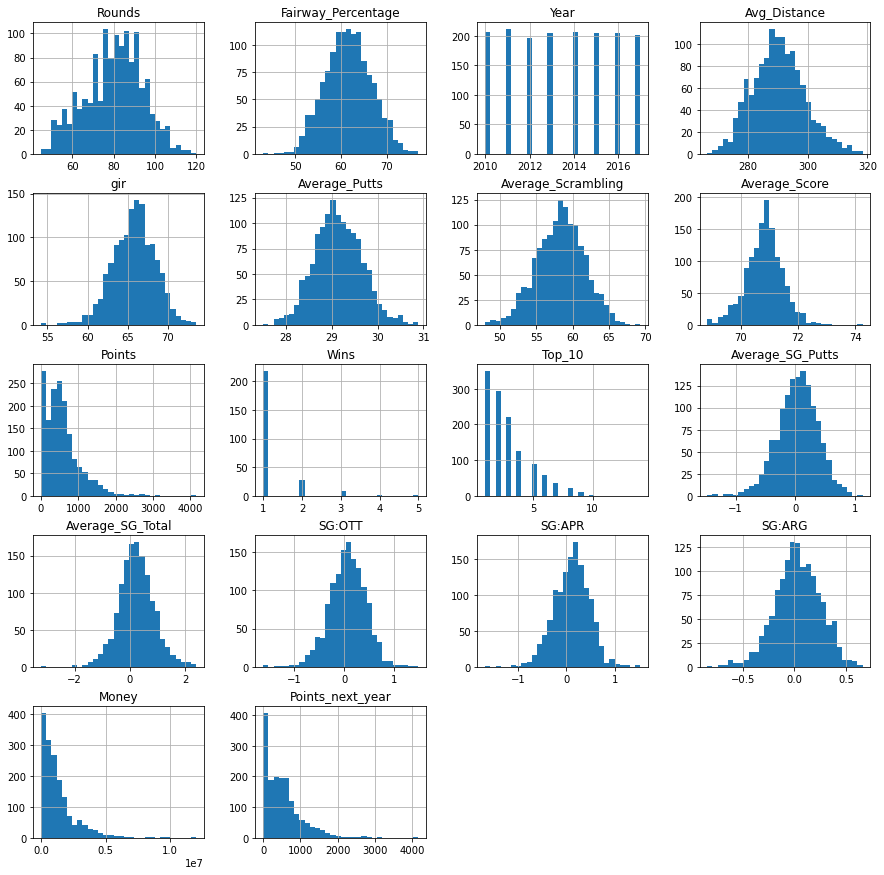

In [12]:
pga.hist(bins=30, figsize=(15, 15));

# Possible regression issues

1. Outliers
2. Multicollinearity
3. Normal distribution
4. Heteroscedasticity


In [13]:
pga.isna().sum()

Player_Name              0
Rounds                 320
Fairway_Percentage     320
Year                     0
Avg_Distance           320
gir                    320
Average_Putts          320
Average_Scrambling     320
Average_Score          320
Points                   8
Wins                  1380
Top_10                 428
Average_SG_Putts       320
Average_SG_Total       320
SG:OTT                 320
SG:APR                 320
SG:ARG                 320
Money                    6
Points_next_year         4
dtype: int64

In [14]:
pga.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1637 entries, 0 to 1636
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player_Name         1637 non-null   object 
 1   Rounds              1317 non-null   float64
 2   Fairway_Percentage  1317 non-null   float64
 3   Year                1637 non-null   int64  
 4   Avg_Distance        1317 non-null   float64
 5   gir                 1317 non-null   float64
 6   Average_Putts       1317 non-null   float64
 7   Average_Scrambling  1317 non-null   float64
 8   Average_Score       1317 non-null   float64
 9   Points              1629 non-null   float64
 10  Wins                257 non-null    float64
 11  Top_10              1209 non-null   float64
 12  Average_SG_Putts    1317 non-null   float64
 13  Average_SG_Total    1317 non-null   float64
 14  SG:OTT              1317 non-null   float64
 15  SG:APR              1317 non-null   float64
 16  SG:ARG

<AxesSubplot:>

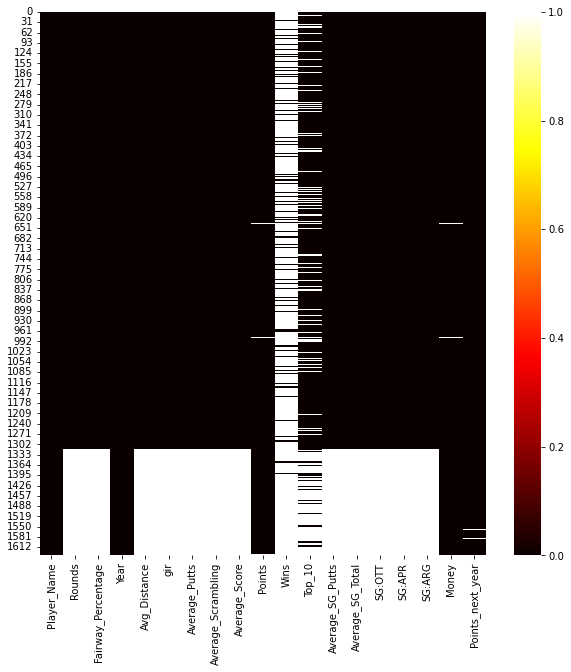

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.isnull(pga),cmap='hot')

# Scenariusz 1 - wyłączenie zmiennych "Wins" oraz "Top_10"

In [16]:
pga_no_wins = pga.drop(columns=['Wins', 'Top_10', 'Player_Name', 'Money', 'Average_SG_Total', 'Year'])
pga_no_wins.dropna(how='any', inplace = True)
#print(pga_no_wins.isna().sum())
pga_no_wins

,Rounds,Fairway_Percentage,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,Average_SG_Putts,SG:OTT,SG:APR,SG:ARG,Points_next_year
0,63.0,72.73,278.8,69.96,29.88,58.31,70.965,222.0,-0.029,0.020,0.121,-0.005,1006.0
1,93.0,71.49,272.3,63.59,28.92,57.99,71.720,285.0,-0.137,-0.340,0.171,-0.164,421.0
2,54.0,70.75,270.1,65.72,29.36,61.03,71.071,232.0,0.187,-0.491,0.492,-0.036,291.0
3,98.0,70.53,284.8,66.91,28.64,63.28,70.244,666.0,0.417,0.121,0.375,-0.073,1020.0
4,89.0,70.06,284.8,67.23,29.61,57.08,71.151,499.0,-0.025,0.257,-0.193,-0.137,449.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,79.0,53.49,291.7,66.51,29.36,58.86,71.171,234.0,0.171,-0.233,-0.211,0.044,456.0
1313,76.0,52.66,299.1,65.13,28.79,61.84,69.966,1629.0,-0.147,0.185,0.738,0.228,1601.0
1314,63.0,52.21,305.7,65.66,29.78,53.53,71.697,97.0,-0.653,0.336,-0.374,-0.298,110.0
1315,82.0,51.29,292.9,65.88,29.14,58.46,70.953,554.0,0.252,-0.538,0.336,0.047,615.0


In [17]:
list_X1 = ['Rounds', 'Fairway_Percentage', 'Avg_Distance', 'gir', 'Average_Putts', 'Average_Scrambling',
          'Average_Score', 'Points', 'Average_SG_Putts', 'SG:OTT', 'SG:APR', 'SG:ARG']
list_y1 = ['Points_next_year']

# Scenariusz 2 - imputacja

In [18]:
# Replace NaN with 0 in Top 10 , BECAUSE they were MNAR
pga['Top_10'].fillna(0, inplace=True)
pga['Top_10'] = pga['Top_10'].astype(int)

# Replace NaN with 0 in # of wins
pga['Wins'].fillna(0, inplace=True)
pga['Wins'] = pga['Wins'].astype(int)

# Drop NaN values 
#df.dropna(axis = 0, inplace=True)


<AxesSubplot:>

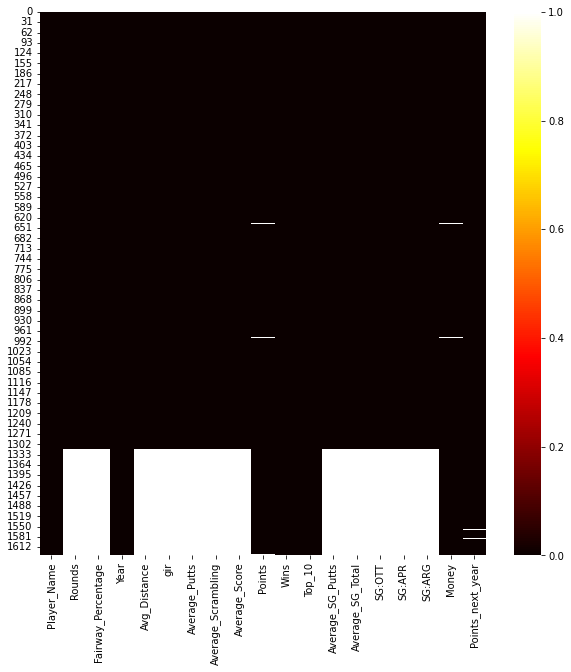

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.isnull(pga),cmap='hot')

In [20]:
pga_clean = pga.dropna(subset=['Rounds'], how='any')

print(pga_clean.isna().sum())
pga_clean.shape

Player_Name           0
Rounds                0
Fairway_Percentage    0
Year                  0
Avg_Distance          0
gir                   0
Average_Putts         0
Average_Scrambling    0
Average_Score         0
Points                3
Wins                  0
Top_10                0
Average_SG_Putts      0
Average_SG_Total      0
SG:OTT                0
SG:APR                0
SG:ARG                0
Money                 3
Points_next_year      0
dtype: int64


(1317, 19)

<AxesSubplot:>

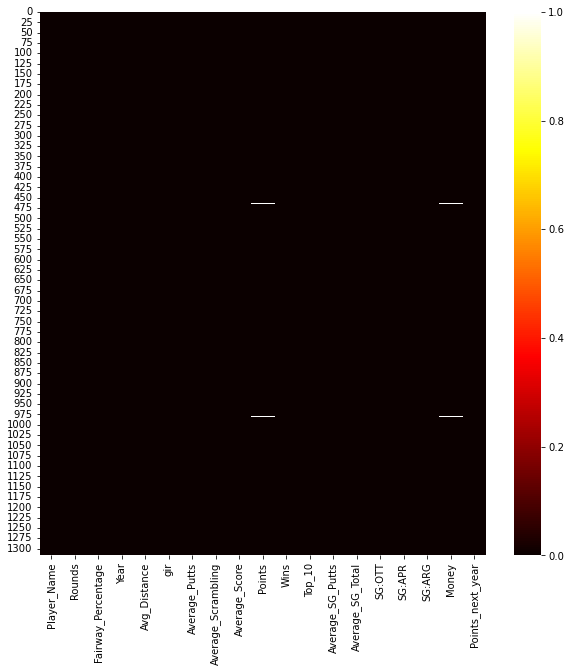

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.isnull(pga_clean),cmap='hot')

In [22]:
pga_clean[pga_clean['Points'].isnull()]

,Player_Name,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,Wins,Top_10,Average_SG_Putts,Average_SG_Total,SG:OTT,SG:APR,SG:ARG,Money,Points_next_year
464,Patrick Rodgers,57.0,56.97,2015,307.7,66.77,28.98,56.47,70.619,NaN,0,0,-0.003,0.129,0.680,-0.456,-0.090,NaN,739.0
637,Brooks Koepka,56.0,56.91,2014,307.0,64.98,28.95,57.51,70.052,NaN,0,0,0.162,0.958,0.425,0.598,-0.226,NaN,1544.0
980,Ryo Ishikawa,54.0,53.28,2012,290.0,59.61,29.44,54.44,70.854,NaN,0,0,0.196,-0.038,-0.199,0.069,-0.104,NaN,298.0


<AxesSubplot:xlabel='Average_SG_Total', ylabel='Points'>

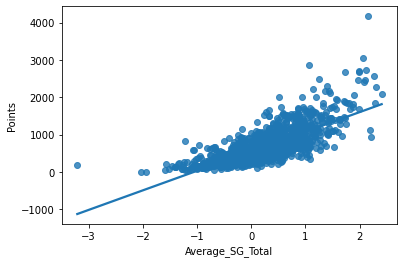

In [23]:
sns.regplot(data=pga_clean, 
            x="Average_SG_Total",
            y="Points",
            ci=None)

In [24]:
pga_clean['sqrt_Points'] = np.sqrt(pga['Points'])
pga_clean['sqrt_Points_x2'] = np.sqrt(np.sqrt(pga['Points']))
pga_clean['log_Points'] = np.log(pga['Points'])

/var/folders/1k/qmqq8bb52d53jfplbrl37dtc0000gn/T/ipykernel_13907/3866320302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pga_clean['sqrt_Points'] = np.sqrt(pga['Points'])
/var/folders/1k/qmqq8bb52d53jfplbrl37dtc0000gn/T/ipykernel_13907/3866320302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pga_clean['sqrt_Points_x2'] = np.sqrt(np.sqrt(pga['Points']))
/var/folders/1k/qmqq8bb52d53jfplbrl37dtc0000gn/T/ipykernel_13907/3866320302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

Text(0, 0.5, 'Points^0.25')

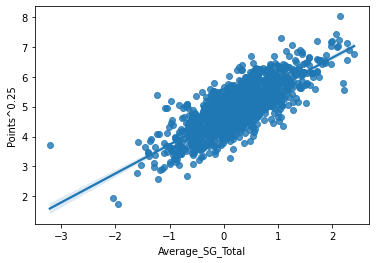

In [25]:
sns.regplot(data=pga_clean, 
            x="Average_SG_Total",
            y="sqrt_Points_x2")
plt.ylabel('Points^0.25')

In [26]:
model_missing = ols('sqrt_Points_x2 ~ Average_SG_Total', data = pga_clean, missing='drop').fit()
print(model_missing.params)

#model_missing.predict(pga.loc[[41, 713,901, 1287],'Average SG Total'])


Intercept           4.698928
Average_SG_Total    0.971678
dtype: float64


In [27]:
#sqrt_Point = intercept + slope * explanatory_data 

missing_Points = (model_missing.params[0] + model_missing.params[1]*pga_clean.loc[[464, 637,980],
                                                                                  'Average_SG_Total'])**4
pga_clean.loc[[464, 637,980],'Points'] = missing_Points
missing_Points



/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


464     541.661575
637    1004.547745
980     472.379050
Name: Average_SG_Total, dtype: float64

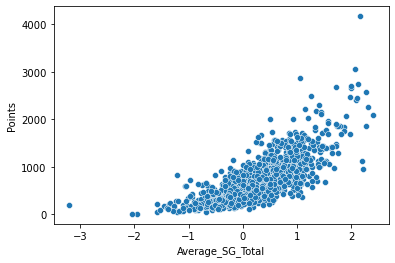

In [28]:
sns.scatterplot(data=pga_clean, 
            x="Average_SG_Total",
            y="Points",
            ci=None)

sns.scatterplot(x=pga_clean.loc[[41, 713,901, 1287],'Average_SG_Total'], y=missing_Points, color='red')
plt.show()

In [29]:
pga_clean.isna().sum()

Player_Name           0
Rounds                0
Fairway_Percentage    0
Year                  0
Avg_Distance          0
gir                   0
Average_Putts         0
Average_Scrambling    0
Average_Score         0
Points                0
Wins                  0
Top_10                0
Average_SG_Putts      0
Average_SG_Total      0
SG:OTT                0
SG:APR                0
SG:ARG                0
Money                 3
Points_next_year      0
sqrt_Points           3
sqrt_Points_x2        3
log_Points            3
dtype: int64

In [30]:
#pga_clean = pga_clean.drop(columns='sqrt_Points')
#pga_clean

# Correlations and distributions

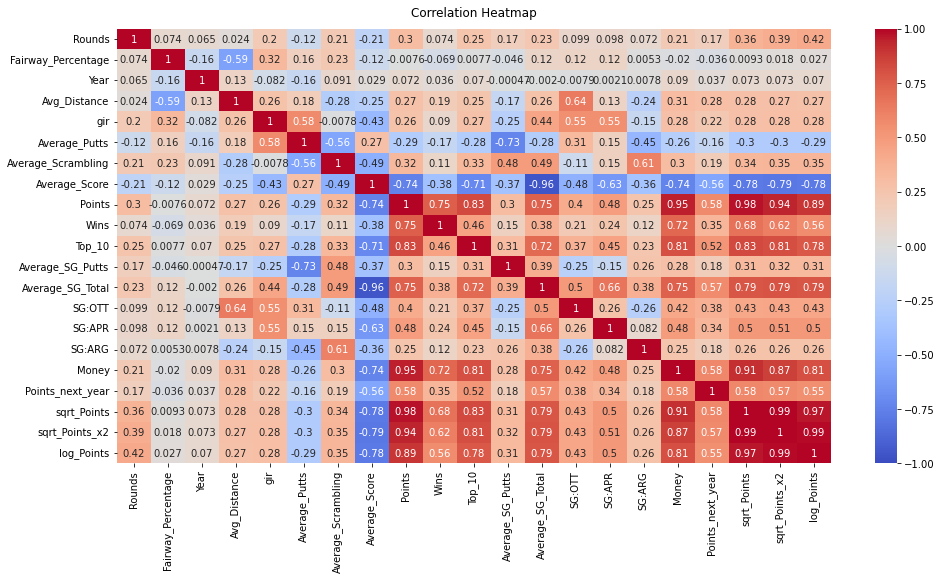

In [31]:
plt.figure(figsize=(16,8))
heatmap = sns.heatmap(pga_clean.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<AxesSubplot:xlabel='sqrt_Points_x2', ylabel='Count'>

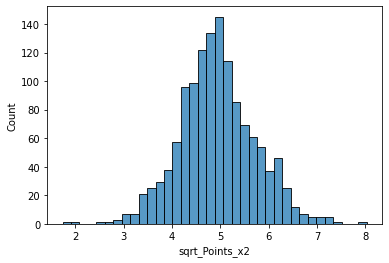

In [32]:
sns.histplot(pga_clean['sqrt_Points_x2'])

In [33]:
#sns.pairplot(pga_clean)

In [34]:
pga_clean['sqrt_Points'] = np.sqrt(pga_clean['Points'])
pga_clean['sqrt_Points_x2'] = np.sqrt(np.sqrt(pga_clean['Points']))
pga_clean['log_Points'] = np.log(pga_clean['Points'])

/var/folders/1k/qmqq8bb52d53jfplbrl37dtc0000gn/T/ipykernel_13907/2493100938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pga_clean['sqrt_Points'] = np.sqrt(pga_clean['Points'])
/var/folders/1k/qmqq8bb52d53jfplbrl37dtc0000gn/T/ipykernel_13907/2493100938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pga_clean['sqrt_Points_x2'] = np.sqrt(np.sqrt(pga_clean['Points']))
/var/folders/1k/qmqq8bb52d53jfplbrl37dtc0000gn/T/ipykernel_13907/2493100938.py:3: SettingWithCopyWarning: 
A value is trying to be s

# Looking for outliers in pga_clean

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Points'>

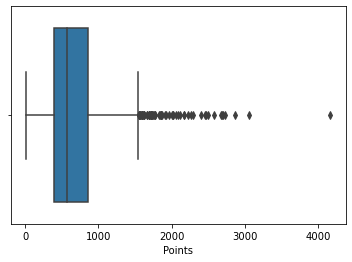

In [35]:
sns.boxplot(pga_clean["Points"])

In [36]:
IQR = pga_clean.quantile(0.75) - pga_clean.quantile(0.25)
IQR
LOW = pga_clean.quantile(0.25) - IQR
HIGH = pga_clean.quantile(0.75) + IQR

In [37]:
round(LOW, 2)

Rounds                    52.00
Fairway_Percentage        51.18
Year                    2008.00
Avg_Distance             273.00
gir                       60.44
Average_Putts             28.08
Average_Scrambling        51.70
Average_Score             69.66
Points                   -74.00
Wins                       0.00
Top_10                    -2.00
Average_SG_Putts          -0.61
Average_SG_Total          -0.95
SG:OTT                    -0.64
SG:APR                    -0.61
SG:ARG                    -0.41
Money                -575421.25
Points_next_year        -282.00
sqrt_Points               10.27
sqrt_Points_x2             3.48
log_Points                 5.18
dtype: float64

In [38]:
round(HIGH, 2)

Rounds                    109.00
Fairway_Percentage         71.85
Year                     2020.00
Avg_Distance              307.20
gir                        71.09
Average_Putts              30.21
Average_Scrambling         64.93
Average_Score              71.98
Points                   1318.00
Wins                        0.00
Top_10                      7.00
Average_SG_Putts            0.71
Average_SG_Total            1.40
SG:OTT                      0.79
SG:APR                      0.82
SG:ARG                      0.48
Money                 3244412.75
Points_next_year         1365.00
sqrt_Points                38.70
sqrt_Points_x2              6.37
log_Points                  7.53
dtype: float64

In [39]:
pga_clean[pga_clean['Points']>HIGH['Points']]

,Player_Name,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,...,Average_SG_Putts,Average_SG_Total,SG:OTT,SG:APR,SG:ARG,Money,Points_next_year,sqrt_Points,sqrt_Points_x2,log_Points
18,Kevin Kisner,105.0,67.00,2017,288.7,66.43,28.79,62.50,70.294,1612.0,...,0.388,1.148,0.257,0.334,0.065,4766936.0,971.0,40.149720,6.336381,7.385231
49,Rickie Fowler,78.0,63.29,2017,300.5,66.98,28.32,62.85,69.083,1832.0,...,0.852,1.875,0.378,0.408,0.349,6083197.0,1302.0,42.801869,6.542314,7.513164
53,Adam Hadwin,98.0,62.85,2017,290.7,64.89,28.43,63.47,70.583,1347.0,...,0.409,0.640,0.003,0.183,-0.044,3455012.0,638.0,36.701499,6.058176,7.205635
63,Brian Harman,104.0,62.07,2017,289.6,63.19,28.30,62.74,70.402,1557.0,...,0.600,0.581,0.015,-0.198,0.329,4396470.0,1056.0,39.458839,6.281627,7.350516
70,Pat Perez,93.0,61.46,2017,290.6,66.04,28.66,63.38,70.250,1461.0,...,0.346,0.877,-0.147,0.222,0.440,4361400.0,1116.0,38.223030,6.182478,7.286876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,Ernie Els,72.0,60.16,2010,288.4,67.86,28.99,61.23,69.843,1846.0,...,0.330,1.322,0.215,0.735,0.043,4558861.0,357.0,42.965102,6.554777,7.520776
1300,Dustin Johnson,83.0,56.35,2010,308.5,67.95,29.37,55.81,70.135,1362.0,...,0.112,0.979,0.760,0.288,-0.179,4473122.0,1191.0,36.905284,6.074972,7.216709
1303,Bubba Watson,77.0,55.67,2010,309.8,68.54,29.40,55.50,70.229,1498.0,...,-0.077,0.695,0.798,0.140,-0.168,3198998.0,1577.0,38.704005,6.221254,7.311886
1304,Jeff Overton,89.0,55.44,2010,297.3,66.86,29.04,56.80,70.497,1536.0,...,0.409,0.630,0.232,0.064,-0.074,3456356.0,611.0,39.191836,6.260338,7.336937


In [40]:
pga_clean[pga_clean['Points']<LOW['Points']]

,Player_Name,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,...,Average_SG_Putts,Average_SG_Total,SG:OTT,SG:APR,SG:ARG,Money,Points_next_year,sqrt_Points,sqrt_Points_x2,log_Points


In [41]:
pga_no_outliers = pga_clean[pga_clean['Points']<HIGH['Points']]
len(pga_no_outliers)

1194

# REGRESSION STATSMODELS

Datasets: pga_clean; pga_small

1. Statsmodels regression
2. Metrics
3. Improvement of the model

In [42]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

In [54]:
# SCENARIUSZ 1 - REGRESSION NO wins or top_10 X VS. POINTS_next_year

X = pga_no_wins[pga_clean.columns.intersection(list_X1)]
#X = sm.tools.add_constant(X)
y = pga_no_wins["Points_next_year"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Points_next_year   R-squared (uncentered):                   0.763
Model:                            OLS   Adj. R-squared (uncentered):              0.761
Method:                 Least Squares   F-statistic:                              349.5
Date:                Wed, 07 Sep 2022   Prob (F-statistic):                        0.00
Time:                        18:50:47   Log-Likelihood:                         -9675.9
No. Observations:                1314   AIC:                                  1.938e+04
Df Residuals:                    1302   BIC:                                  1.944e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Rounds                 0.5951      0.848      0.702      0.483      -1.069       2.259
Fairway_Percentage    -4.3956      4.470     -0.983      0.326     -13.165       4.373
Avg_Distance           1.1468      3.110      0.369      0.712      -4.954       7.248
gir                   -5.0345      8.905     -0.565      0.572     -22.505      12.436
Average_Putts        -22.4641     49.345     -0.455      0.649    -119.268      74.339
Average_Scrambling    -8.1016      5.187     -1.562      0.119     -18.277       2.074
Average_Score         23.4372     22.654      1.035      0.301     -21.006      67.880
Points                 0.3315      0.038      8.785      0.000       0.257       0.406
Average_SG_Putts     235.4289     50.284      4.682      0.000     136.782     334.076
SG:OTT               425.8250     75.915      5.609      0.000     276.896     574.754
SG:APR               233.9812     47.095      4.968      0.000     141.590     326.372
SG:ARG               355.6173     68.919      5.160      0.000     220.412     490.822
==============================================================================
Omnibus:                      344.169   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1501.383
Skew:                           1.176   Prob(JB):                         0.00
Kurtosis:                       7.679   Cond. No.                     7.45e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

67.63217556980453 2
381.88399621020216


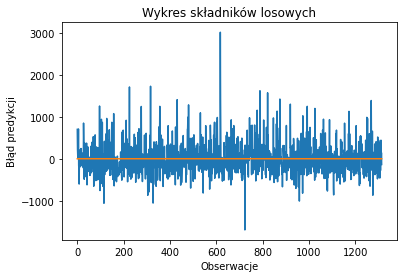

In [44]:
errors = y-predictions

plt.plot(np.arange(0, len(y)), errors)
plt.plot(np.arange(0, len(y)), np.zeros([len(y),]))
plt.title('Wykres składników losowych')
plt.xlabel('Obserwacje')
plt.ylabel('Błąd predykcji')

print(errors.sum(), 2)
print(errors.std())

In [45]:
list_X = ['Rounds', 'Fairway_Percentage', 'Avg_Distance', 'gir', 'Average_Putts', 'Average_Scrambling',
          'Average_Score', 'Points', 'Wins', 'Top_10', 'Average_SG_Putts', 'SG:OTT', 'SG:APR', 'SG:ARG']
list_y = ['Points_next_year']

In [57]:
# SCENARIUSZ 2 - REGRESSION CLEAN LIST_X VS. POINTS

X = pga_clean[pga_clean.columns.intersection(list_X)]
#X = sm.tools.add_constant(X)
y = pga_clean["Points_next_year"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Points_next_year   R-squared (uncentered):                   0.764
Model:                            OLS   Adj. R-squared (uncentered):              0.762
Method:                 Least Squares   F-statistic:                              302.1
Date:                Wed, 07 Sep 2022   Prob (F-statistic):                        0.00
Time:                        18:51:58   Log-Likelihood:                         -9695.0
No. Observations:                1317   AIC:                                  1.942e+04
Df Residuals:                    1303   BIC:                                  1.949e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Rounds                 0.0654      0.881      0.074      0.941      -1.663       1.794
Fairway_Percentage    -3.9414      4.462     -0.883      0.377     -12.694       4.811
Avg_Distance           1.5413      3.104      0.496      0.620      -4.549       7.631
gir                   -4.5951      8.841     -0.520      0.603     -21.939      12.749
Average_Putts        -23.0360     48.972     -0.470      0.638    -119.109      73.037
Average_Scrambling    -8.6057      5.184     -1.660      0.097     -18.775       1.564
Average_Score         21.6304     22.579      0.958      0.338     -22.666      65.927
Points                 0.4168      0.080      5.199      0.000       0.259       0.574
Wins                 -73.4951     38.077     -1.930      0.054    -148.194       1.204
Top_10                 4.4542     10.491      0.425      0.671     -16.127      25.036
Average_SG_Putts     207.6120     51.309      4.046      0.000     106.955     308.269
SG:OTT               387.5222     77.395      5.007      0.000     235.689     539.355
SG:APR               203.9310     48.817      4.177      0.000     108.162     299.700
SG:ARG               329.4722     69.475      4.742      0.000     193.178     465.766
==============================================================================
Omnibus:                      336.583   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1330.047
Skew:                           1.178   Prob(JB):                    1.53e-289
Kurtosis:                       7.322   Cond. No.                     7.75e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

58.75118849038063
381.0330101101648


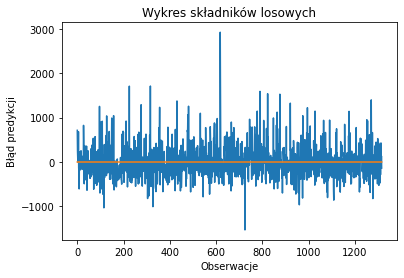

In [58]:
errors = y-predictions

plt.plot(np.arange(0, len(y)), errors)
plt.plot(np.arange(0, len(y)), np.zeros([len(y),]))
plt.title('Wykres składników losowych')
plt.xlabel('Obserwacje')
plt.ylabel('Błąd predykcji')

print(errors.sum())
print(errors.std())

In [48]:
# SCENARIUSZ 3 - REGRESSION NO_OUTLIERS LIST_X VS. POINTS

X = pga_no_outliers[pga_no_outliers.columns.intersection(list_X)]
y = pga_no_outliers["Points_next_year"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Points_next_year   R-squared (uncentered):                   0.751
Model:                            OLS   Adj. R-squared (uncentered):              0.748
Method:                 Least Squares   F-statistic:                              253.7
Date:                Wed, 07 Sep 2022   Prob (F-statistic):                        0.00
Time:                        18:40:17   Log-Likelihood:                         -8663.0
No. Observations:                1194   AIC:                                  1.735e+04
Df Residuals:                    1180   BIC:                                  1.743e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Rounds                -0.4581      0.859     -0.533      0.594      -2.143       1.227
Fairway_Percentage    -5.6239      4.212     -1.335      0.182     -13.887       2.639
Avg_Distance          -0.5020      2.925     -0.172      0.864      -6.242       5.238
gir                   -1.5413      8.367     -0.184      0.854     -17.958      14.875
Average_Putts         14.2872     46.104      0.310      0.757     -76.167     104.741
Average_Scrambling    -9.4752      4.853     -1.953      0.051     -18.996       0.046
Average_Score         14.4672     21.162      0.684      0.494     -27.052      55.987
Points                 0.4370      0.086      5.082      0.000       0.268       0.606
Wins                 -78.5210     41.791     -1.879      0.061    -160.514       3.472
Top_10                 0.2747     10.333      0.027      0.979     -19.999      20.548
Average_SG_Putts     226.9501     49.137      4.619      0.000     130.544     323.356
SG:OTT               372.1187     73.866      5.038      0.000     227.195     517.043
SG:APR               210.6092     47.122      4.469      0.000     118.157     303.061
SG:ARG               338.1726     65.643      5.152      0.000     209.383     466.962
==============================================================================
Omnibus:                      205.080   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              396.692
Skew:                           1.020   Prob(JB):                     7.24e-87
Kurtosis:                       4.953   Cond. No.                     6.51e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

52.17874206912529
342.7226638488441


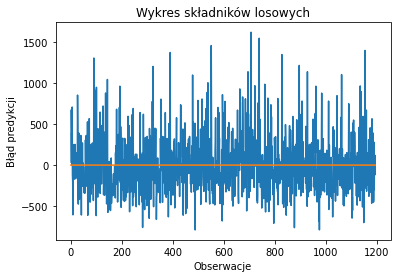

In [49]:
errors = y-predictions

plt.plot(np.arange(0, len(y)), errors)
plt.plot(np.arange(0, len(y)), np.zeros([len(y),]))
plt.title('Wykres składników losowych')
plt.xlabel('Obserwacje')
plt.ylabel('Błąd predykcji')

print(errors.sum())
print(errors.std())